In [1]:
import os, pandas as pd
from sqlalchemy import create_engine, text

In [2]:
engine = create_engine(os.getenv("DATABASE_URL"), pool_pre_ping=True)

In [3]:
# Omit schema prefixes when querying
with engine.begin() as c:
    c.execute(text("SET search_path TO cleaned, raw;"))

In [4]:
# See whats available
pd.read_sql("""
SELECT table_schema, table_name
FROM information_schema.tables
WHERE table_schema IN ('cleaned','raw')
ORDER BY 1,2
""", engine)

,table_schema,table_name
0,cleaned,listings_amenities_wide
1,cleaned,listings_base
2,raw,listings
3,raw,reviews


In [6]:
# load saved cleaned tables
listings = pd.read_sql("SELECT * FROM listings_base", engine)
amens = pd.read_sql("SELECT * FROM listings_amenities_wide", engine)

In [7]:
listings.head()

,id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,1389063,Sue,2011-11-09,0.86,1.0,f,12.0,...,4.84,4.74,4.62,4.72,t,11,11,0,0,0.51
1,264777,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,1389063,Sue,2011-11-09,0.86,1.0,f,12.0,...,4.58,4.25,4.54,4.42,t,11,11,0,0,0.22
2,264778,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,1389063,Sue,2011-11-09,0.86,1.0,f,12.0,...,4.72,4.52,4.36,4.38,t,11,11,0,0,0.43
3,264779,Refurbished Two Bedroom Apartment,A large and sunny two bedroom second floor apa...,1389063,Sue,2011-11-09,0.86,1.0,f,12.0,...,4.83,4.61,4.50,4.47,t,11,11,0,0,0.30
4,264780,Spacious refurbished 2 bedroom apt with balcony,Completely refurbished 2 bedroom apt to sleep ...,1389063,Sue,2011-11-09,0.86,1.0,f,12.0,...,4.81,4.74,4.37,4.59,t,11,11,0,0,0.35


In [8]:
amens.head()

,amen__air_conditioning,amen__arcade_games,amen__baby_bath,amen__baby_bath_-_available_upon_request,amen__baby_monitor,amen__baby_safety_gates,amen__babysitter_recommendations,amen__backyard,amen__baking_sheet,amen__barbecue_utensils,...,amen__toaster,amen__trash_compactor,amen__tv,amen__tv_with_standard_cable,amen__washer,amen__washer_– in_unit,amen__waterfront,amen__wifi,amen__window_guards,amen__wine_glasses
0,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,...,1,0,1,0,0,0,0,1,0,1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,1,0,0


In [10]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96651 entries, 0 to 96650
Data columns (total 57 columns):
 #   Column                                        Non-Null Count  Dtype         
---  ------                                        --------------  -----         
 0   id                                            96651 non-null  object        
 1   name                                          96651 non-null  object        
 2   description                                   93806 non-null  object        
 3   host_id                                       96651 non-null  object        
 4   host_name                                     96613 non-null  object        
 5   host_since                                    96651 non-null  datetime64[ns]
 6   host_response_rate                            96651 non-null  float64       
 7   host_acceptance_rate                          96651 non-null  float64       
 8   host_is_superhost                             96651 non-null  obje

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

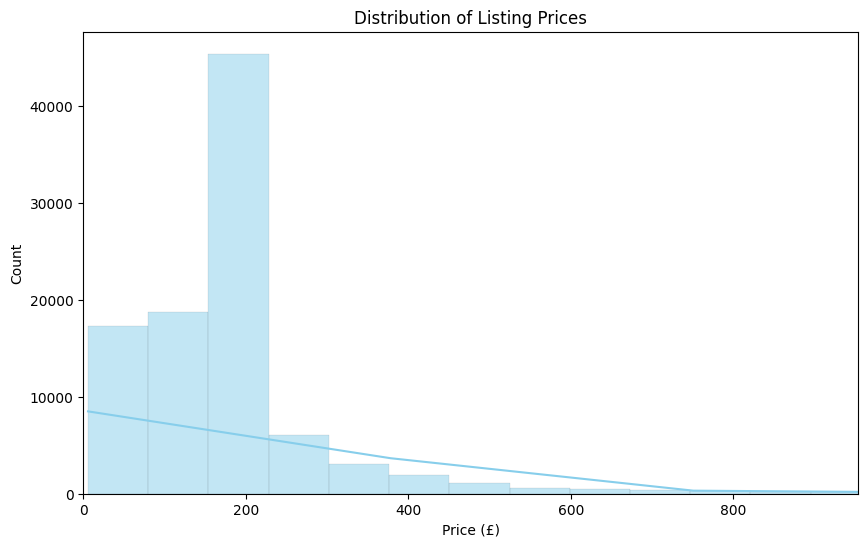

In [21]:
#Basic price distribution
plt.figure(figsize=(10,6))
sns.histplot(listings['price'], bins=1000, kde=True, color='skyblue')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price (£)')
plt.ylabel('Count')
plt.xlim(0, listings['price'].quantile(0.99))  # zoom in, cut extreme outliers
plt.show()

/tmp/ipykernel_926/3834663690.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


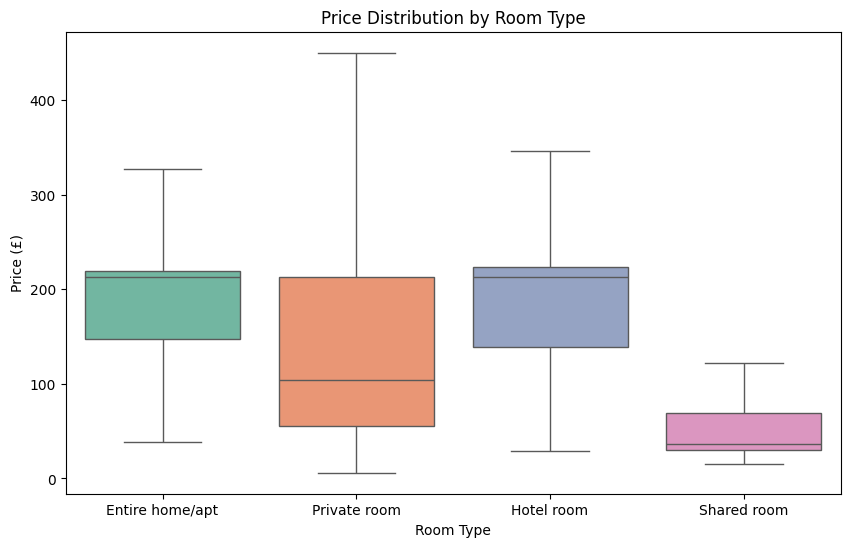

In [22]:
#Compare by room type
plt.figure(figsize=(10,6))
sns.boxplot(
    data=listings,
    x='room_type',
    y='price',
    showfliers=False,  # hides extreme outliers for readability
    palette='Set2'
)
plt.title('Price Distribution by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price (£)')
plt.show()

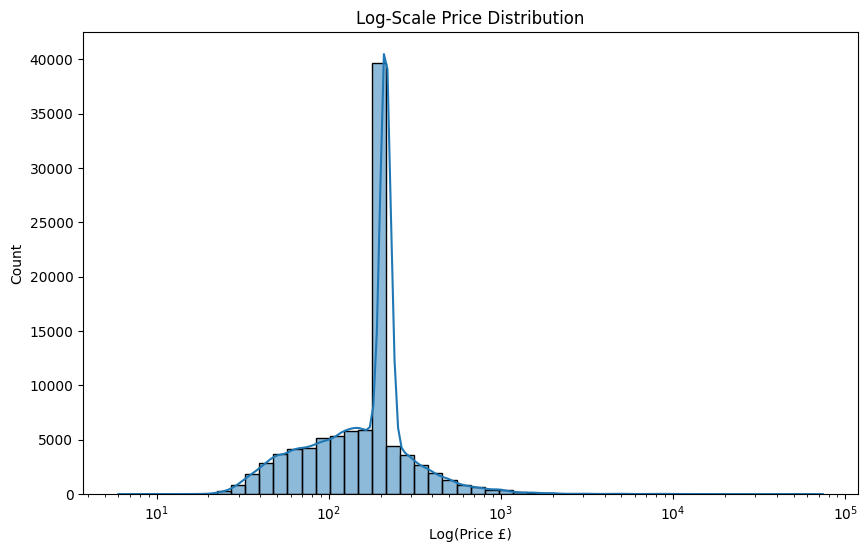

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(listings['price'], bins=50, kde=True, log_scale=True)
plt.title('Log-Scale Price Distribution')
plt.xlabel('Log(Price £)')
plt.ylabel('Count')
plt.show()

In [29]:
# Keep a trimmed frame for plotting
plot_df = listings.copy()
plot_df = plot_df[(plot_df["price"] > 5) & (plot_df["price"] < plot_df["price"].quantile(0.99))]
plot_df.head(3)

,id,name,description,host_id,host_name,host_since,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,264776,Huge Four Bedroom Apartment,An extremely large and sunny four bedroom grou...,1389063,Sue,2011-11-09,0.86,1.0,f,12.0,...,4.84,4.74,4.62,4.72,t,11,11,0,0,0.51
1,264777,One Bedroom Apartment,Recently refurbished sunny one bedroom first f...,1389063,Sue,2011-11-09,0.86,1.0,f,12.0,...,4.58,4.25,4.54,4.42,t,11,11,0,0,0.22
2,264778,Two Bedroom Newly Refurbished Apartment,A large and sunny two bedroom second floor apa...,1389063,Sue,2011-11-09,0.86,1.0,f,12.0,...,4.72,4.52,4.36,4.38,t,11,11,0,0,0.43


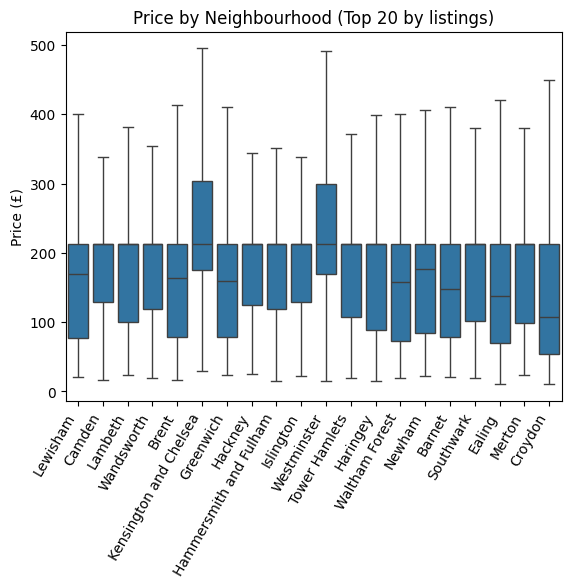

In [31]:
top_neigh = (plot_df.groupby("neighbourhood_cleansed", dropna=False)["id"]
             .count().sort_values(ascending=False).head(20).index)

ax = sns.boxplot(
    data=plot_df[plot_df["neighbourhood_cleansed"].isin(top_neigh)],
    x="neighbourhood_cleansed", y="price", showfliers=False
)
ax.set(title="Price by Neighbourhood (Top 20 by listings)", xlabel="", ylabel="Price (£)")
plt.xticks(rotation=60, ha="right"); plt.show()

In [34]:
# Host tenure (years)
plot_df["host_tenure_yrs"] = ((pd.Timestamp.now(tz=None) - listings["host_since"]).dt.days / 365).astype(float)

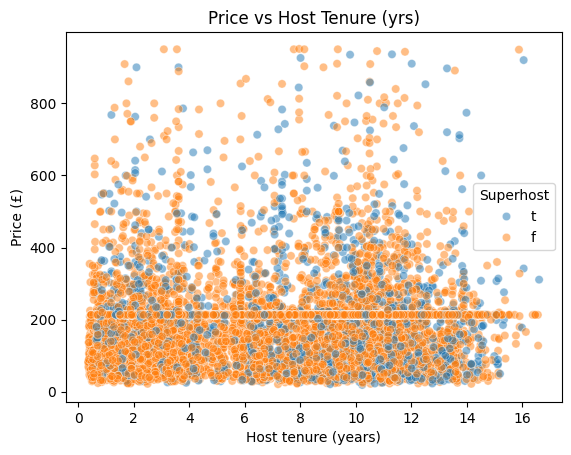

In [35]:
ax = sns.scatterplot(
    data=plot_df.sample(min(10000, len(plot_df)), random_state=42),
    x="host_tenure_yrs", y="price", hue="host_is_superhost", alpha=0.5
)
ax.set(title="Price vs Host Tenure (yrs)", xlabel="Host tenure (years)", ylabel="Price (£)")
plt.legend(title="Superhost", loc="best"); plt.show()

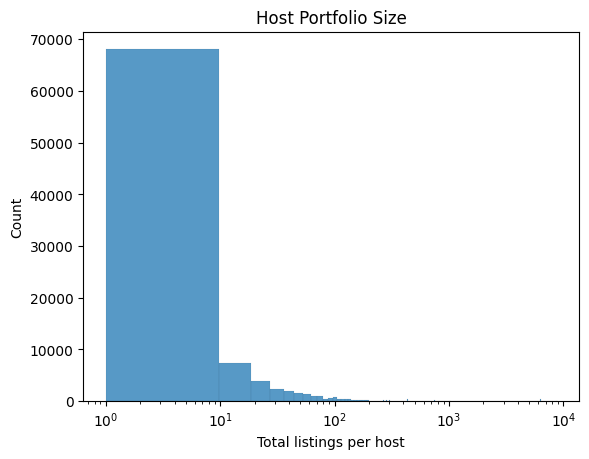

In [40]:
ax = sns.histplot(listings["host_total_listings_count"], bins=1000)
ax.set(title="Host Portfolio Size", xlabel="Total listings per host", ylabel="Count")
plt.xscale("log"); plt.show()

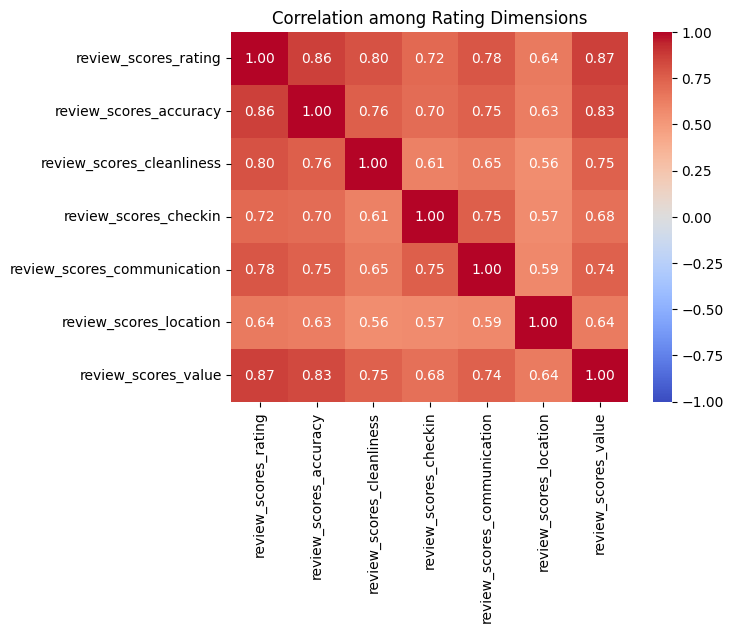

In [41]:
rating_cols = [
    "review_scores_rating","review_scores_accuracy","review_scores_cleanliness",
    "review_scores_checkin","review_scores_communication","review_scores_location",
    "review_scores_value"
]
corr = listings[rating_cols].corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation among Rating Dimensions"); plt.show()

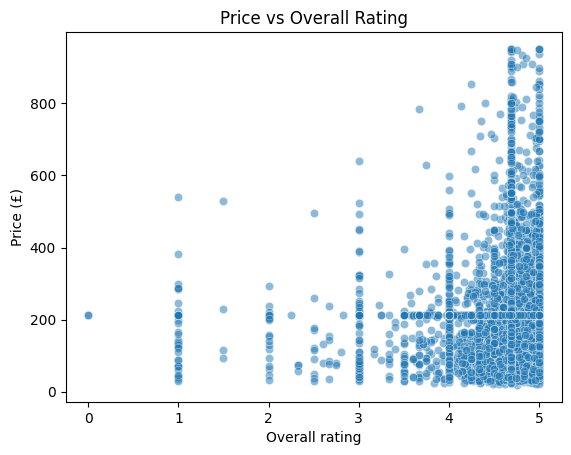

In [43]:
ax = sns.scatterplot(
    data=plot_df.sample(min(10000, len(plot_df)), random_state=42),
    x="review_scores_rating", y="price", alpha=0.5
)
ax.set(title="Price vs Overall Rating", xlabel="Overall rating", ylabel="Price (£)")
plt.show()

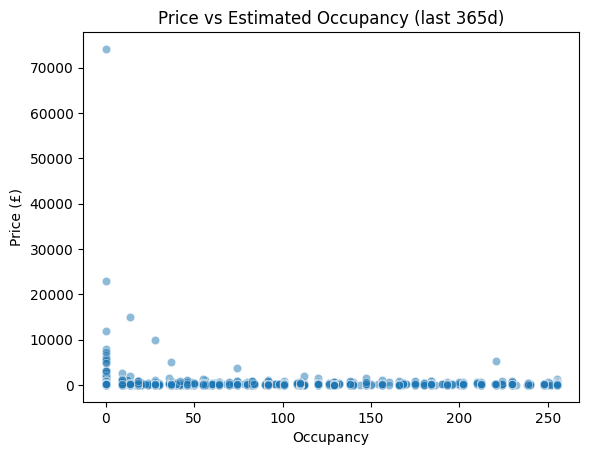

In [44]:
ax = sns.scatterplot(
    data=listings.dropna(subset=["estimated_occupancy_l365d","price"]).sample(min(10000, len(listings)), random_state=42),
    x="estimated_occupancy_l365d", y="price", alpha=0.5
)
ax.set(title="Price vs Estimated Occupancy (last 365d)", xlabel="Occupancy", ylabel="Price (£)")
plt.show()

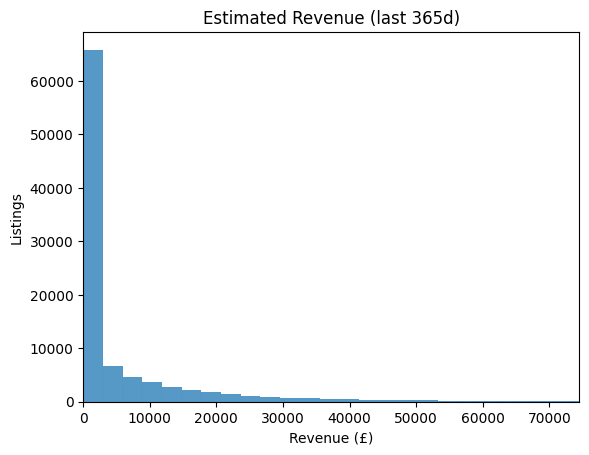

In [47]:
ax = sns.histplot(listings["estimated_revenue_l365d"].dropna(), bins=5000)
ax.set(title="Estimated Revenue (last 365d)", xlabel="Revenue (£)", ylabel="Listings")
plt.xlim(0, listings["estimated_revenue_l365d"].quantile(0.99)); plt.show()

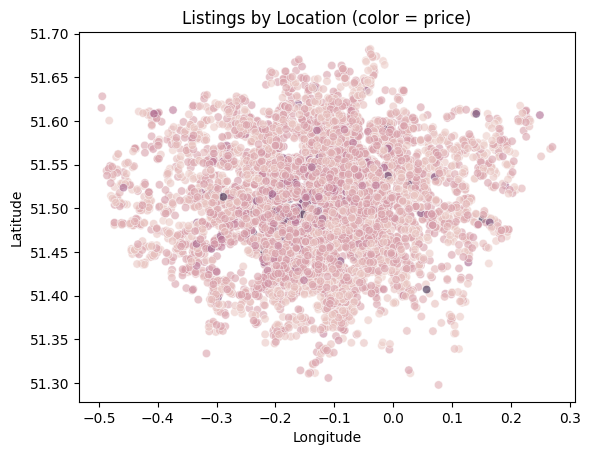

In [49]:
# Quick preview: latitude/longitude colored by price (sampled)
geo = plot_df.dropna(subset=["latitude","longitude"]).sample(min(15000, len(plot_df)), random_state=42)
ax = sns.scatterplot(data=geo, x="longitude", y="latitude",
                     hue="price", size=None, alpha=0.6, legend=False)
ax.set(title="Listings by Location (color = price)", xlabel="Longitude", ylabel="Latitude")
plt.show()

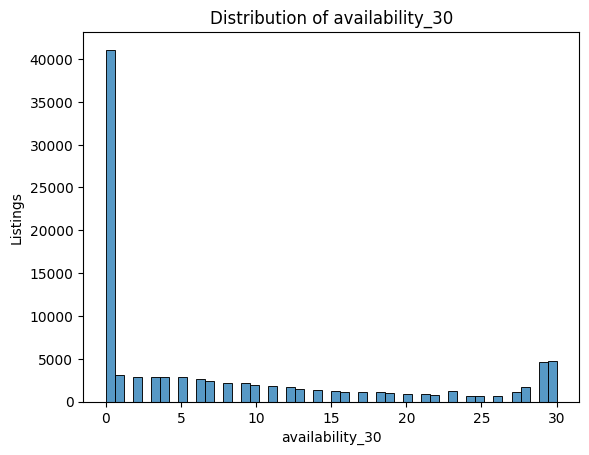

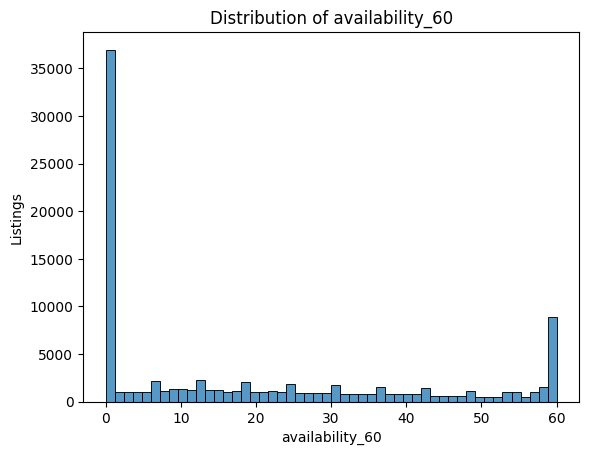

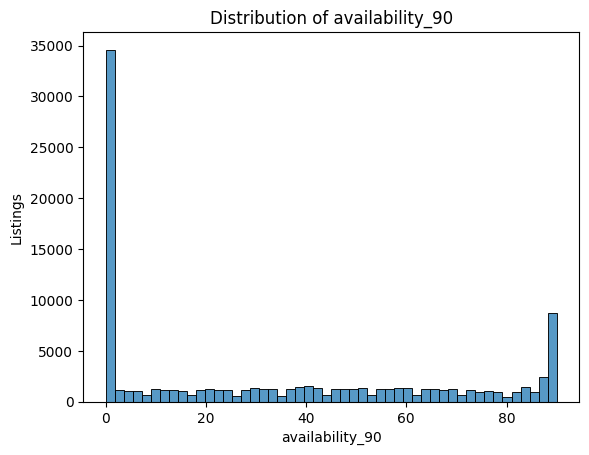

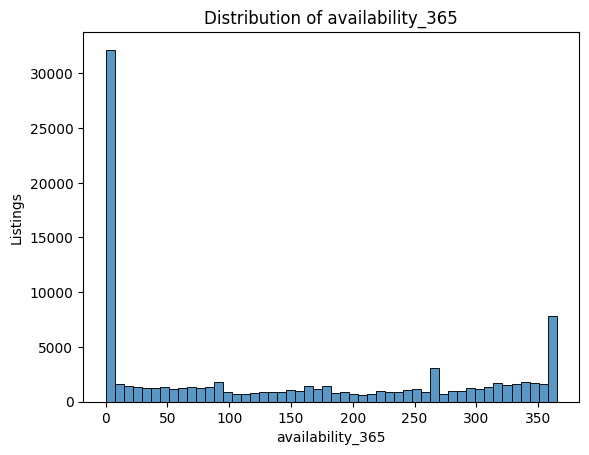

In [50]:
for col in ["availability_30","availability_60","availability_90","availability_365"]:
    ax = sns.histplot(listings[col].dropna(), bins=50)
    ax.set(title=f"Distribution of {col}", xlabel=col, ylabel="Listings")
    plt.show()

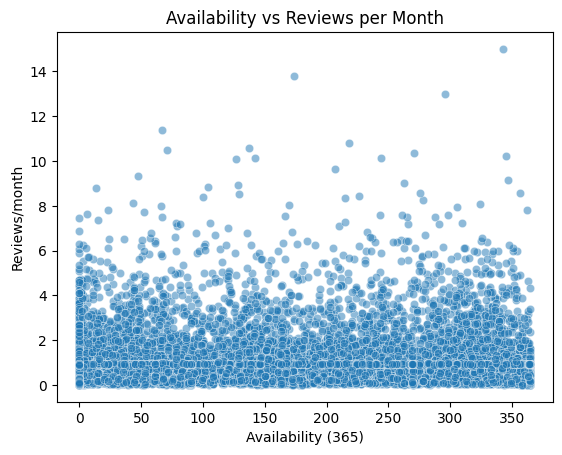

In [51]:
ax = sns.scatterplot(
    data=listings.dropna(subset=["availability_365","reviews_per_month"]).sample(min(15000, len(listings)), random_state=42),
    x="availability_365", y="reviews_per_month", alpha=0.5
)
ax.set(title="Availability vs Reviews per Month", xlabel="Availability (365)", ylabel="Reviews/month")
plt.show()